# Evaluation of driven simulation

In [1]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import ipywidgets as widgets

from src.postprocessing.visualization import ernesto_plotter
from src.postprocessing.metrics import compute_metrics, _mse

In [2]:
folder = "../data/output/driven"
path = Path(folder)

In [3]:
file_types = ['None']
file_types.extend(os.listdir(path))
file_types = [f for f in file_types if not f.startswith('.')]
file_types = sorted(file_types)

y = widgets.Dropdown(
    options=file_types,
    value='None',
    description='Select experiment folder:',
    disabled=False)

def on_folder_selection(selection):
    if selection['type'] == 'change' and selection['name'] == 'value':
        print("Selected path containing simulation data: %s" % path + '/' + selection['new'])
    y.disabled = True
    
y.observe(on_folder_selection)

display(y)

Dropdown(description='Select experiment folder:', index=1, options=('20C_check_up', 'None', 'PV_profile', 'bas…

In [4]:
files = ['None']
specific_exp_path = path / y.value
files.extend(os.listdir(specific_exp_path))
files = [f for f in files if not f.startswith('.')]
files = sorted(files)

w = widgets.Dropdown(
        options=files,
        value='None',
        description='Select the desired experiment:',
        disabled=False)

def on_exp_selection(selection):
    if selection['type'] == 'change' and selection['name'] == 'value':
        print("Selected path containing simulation data: %s" % path + '/' + selection['new'])
    
    w.disabled = True

w.observe(on_exp_selection)
display(w)

Dropdown(description='Select the desired experiment:', index=1, options=('2024_11_08-16_51_08', 'None'), value…

In [5]:
file_path = specific_exp_path / w.value

In [6]:
grounds = [f for f in os.listdir(file_path) if f.startswith('ground')]
sorted(grounds)
df_ground = pd.concat((pd.read_csv(file_path / f) for f in sorted(grounds)), ignore_index=True)

In [7]:
sim_datasets = [f for f in os.listdir(file_path) if f.startswith('dataset')]
sim_datasets = sorted(sim_datasets)
df_sim = pd.concat((pd.read_csv(file_path / f) for f in sorted(sim_datasets)), ignore_index=True)

In [8]:
df_sim

,time,soc,soh,c_max,voltage,current,power,v_oc,r0,r1,c,v_r0,v_rc,i_r1,i_c,temperature,heat
0,-1.0,0.860000,1.0,20.0,4.150000,0.0000,0.000000,0.000000,0.003415,0.00479,33339.962429,0.000000,0.000000,0.000000,0.000000,298.150000,0.000000
1,0.0,0.860000,1.0,20.0,4.005474,0.0000,-0.000000,4.005474,0.003415,0.00479,33339.962429,0.000000,0.000000,0.000000,0.000000,298.150000,0.000000
2,1.0,0.860084,1.0,20.0,4.026401,-6.0750,24.460388,4.005474,0.003415,0.00479,33339.962429,-0.020746,-0.000181,-0.037804,-6.037196,298.150561,0.126040
3,2.0,0.860169,1.0,20.0,4.026662,-6.0750,24.461971,4.005555,0.003415,0.00479,33339.962429,-0.020746,-0.000361,-0.075372,-5.999628,298.151121,0.126060
4,3.0,0.860251,1.0,20.0,4.026277,-5.8880,23.706719,4.005635,0.003415,0.00479,33339.962429,-0.020108,-0.000534,-0.111543,-5.776457,298.151656,0.118453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,2548947.0,0.557600,1.0,20.0,3.645347,11.2285,-40.931781,3.737673,0.003415,0.00479,33339.962429,0.038345,0.053981,11.269481,-0.040981,299.474370,1.038896
2499996,2548948.0,0.557444,1.0,20.0,3.645264,11.2285,-40.930850,3.737589,0.003415,0.00479,33339.962429,0.038345,0.053980,11.269226,-0.040726,299.473803,1.038869
2499997,2548949.0,0.557288,1.0,20.0,3.645181,11.2285,-40.929918,3.737505,0.003415,0.00479,33339.962429,0.038345,0.053978,11.268973,-0.040473,299.473236,1.038841
2499998,2548950.0,0.557132,1.0,20.0,3.645005,11.2555,-41.026357,3.737421,0.003415,0.00479,33339.962429,0.038438,0.053978,11.268889,-0.013389,299.472671,1.040905


In [9]:
df_ground

,current,voltage,temperature,time
0,-0.0000,4.150000,298.150000,0.0
1,6.0750,4.023267,298.150561,1.0
2,6.0750,4.023515,298.151121,2.0
3,5.8880,4.023213,298.151656,3.0
4,5.9680,4.023685,298.152200,4.0
...,...,...,...,...
2499994,-11.2285,3.640440,299.474370,2548947.0
2499995,-11.2285,3.646057,299.473803,2548948.0
2499996,-11.2285,3.634678,299.473236,2548949.0
2499997,-11.2555,3.632749,299.472671,2548950.0


### Compute metrics to evaluate the simulation
The simulated dataset might have more entries than the ground one. <br>
This happens when the timestep is high in certain points, and the simulator induces an additional rest step, that is stored within the simulated dataset, but that is not present among ground samples. <br>
Thus, we need to compare only the sample which belong to both the datasets.

In [119]:
vars_to_compare = ['voltage']
ground_dict = {}
sim_dict = {}

for var in vars_to_compare:
    ground_dict[var] = df_ground[var].values
    sim_dict[var] = df_sim[df_sim['time'].isin(df_ground['time'].values)][var].values

compute_metrics(ground=ground_dict, 
                simulated=sim_dict, 
                vars=vars_to_compare, 
                metrics=None, 
                steps=None)

AssertionError: MSE: ground and simulated data have different lengths (2499998, 2451045)

### Comparison of simulated and ground data
In this example, the current used as input is the inverse of the signal saved as output, since the DT converts the current signal to the active convetion. Hence, only for the current, there is this discrepancy between the ground and simulated variable.

In [19]:
comparison_params = {
    'dfs': [df_ground[-20000:], df_sim[-20000:]], 
    'variables': ['current', 'voltage', 'temperature'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': ['Ground', 'Simulated'],
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[A]', '[V]', '[K]'],
    'markers': ['o', 's'],
    'line_styles': ['--', '-'],
    'title': 'Current',
    'save_fig': False,
    'sampling_rate': 1000,
    'colors': ['cyan', 'violet'],
    'plot_type': 'line',
    'dest': file_path, 
    'fig_name': '20C',
    'pic_format': 'png',
    'figsize': (15, 4),
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'figsize': (15, 5)
}

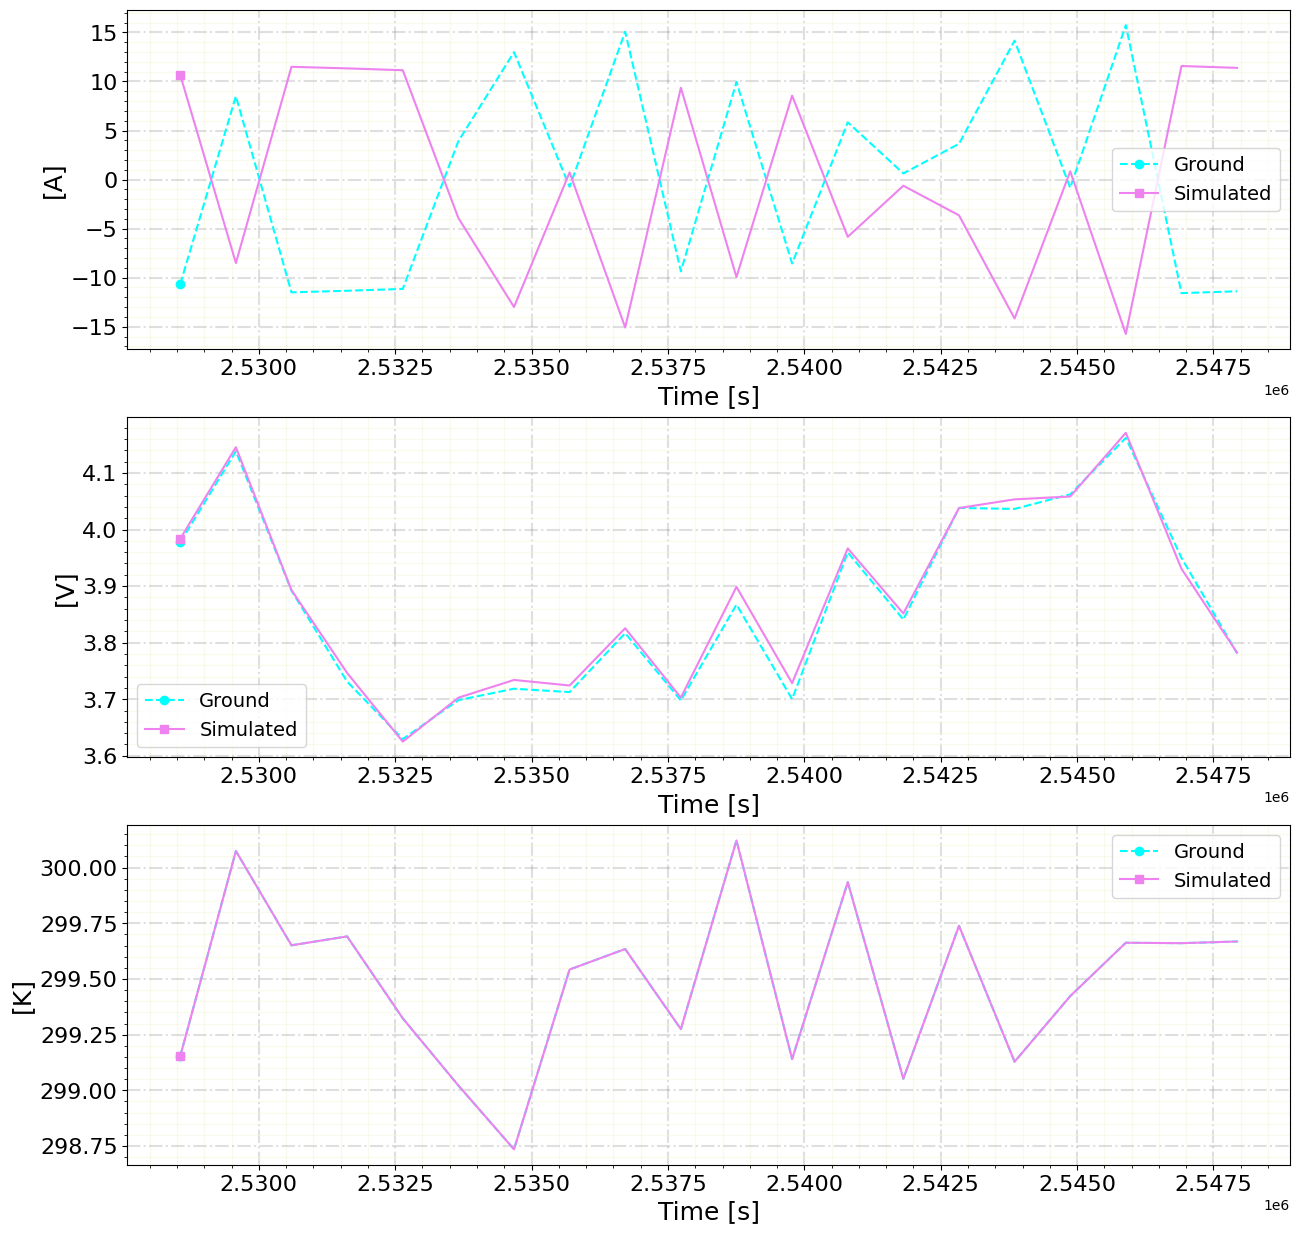

In [20]:
ernesto_plotter(**comparison_params)

### Plot standalone variables

In [16]:
single_plot_params = {
    'dfs': [df_ground[-20000:]],
    'variables': ['current', 'voltage', 'temperature'], 
    'x_axes': ['time', 'time', 'time', 'time'], 
    'x_labels': ['Time [s]'] * 4,
    'y_labels': ['[A]', '[V]', '[K]'],
    'labels': ['Simulated'],
    'markers': ['s', 'o', 's', 'o'],
    'line_styles': ['solid', 'dashed', 'dashed', 'solid'],
    'plot_type': 'line',
    'sampling_rate': 1,
    'colors': ['purple'],
    'save_fig': False,
    'fig_name': 'PV',
    'pic_format': 'png',
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'figsize': (15, 5),
    'dest': file_path
}

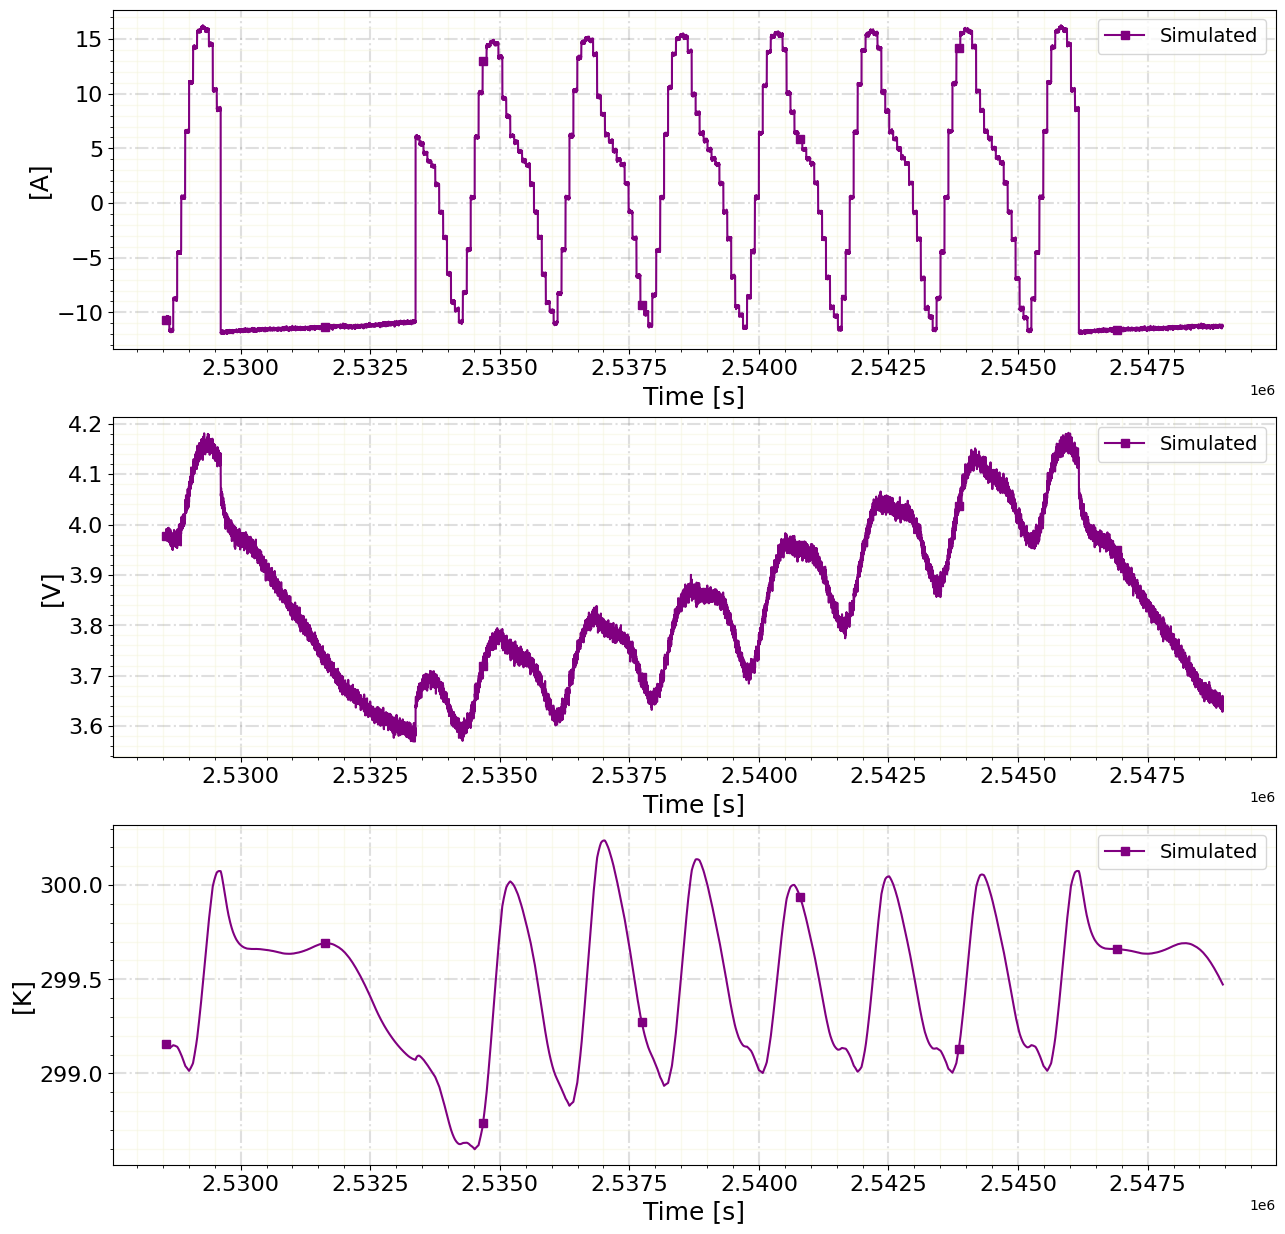

In [17]:
ernesto_plotter(**single_plot_params)

In [101]:
electrical_params = {
    'dfs': [df_sim],
    'variables': ['r0', 'r1', 'c', 'soc', 'soh'], 
    'x_axes': ['time', 'time', 'time', 'time', 'time'], 
    'x_labels': ['Time [s]'] * 5,
    'y_labels': ['R0 [ohm]', 'R1 [ohm]', 'C [F]', 'SoC [%]', 'SoH [%]'],
    'labels': ['Simulated'],
    'markers': ['', '', '', '', ''],
    'line_styles': ['solid', 'solid', 'solid', 'solid', 'solid'],
    'plot_type': 'line',
    'colors': ['purple'],
    'sampling_rate': 1000,
    'save_fig': False,
    'fig_name': 'cell_ground',
    'pic_format': 'png',
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'figsize': (15, 5),
    'dest': file_path
}

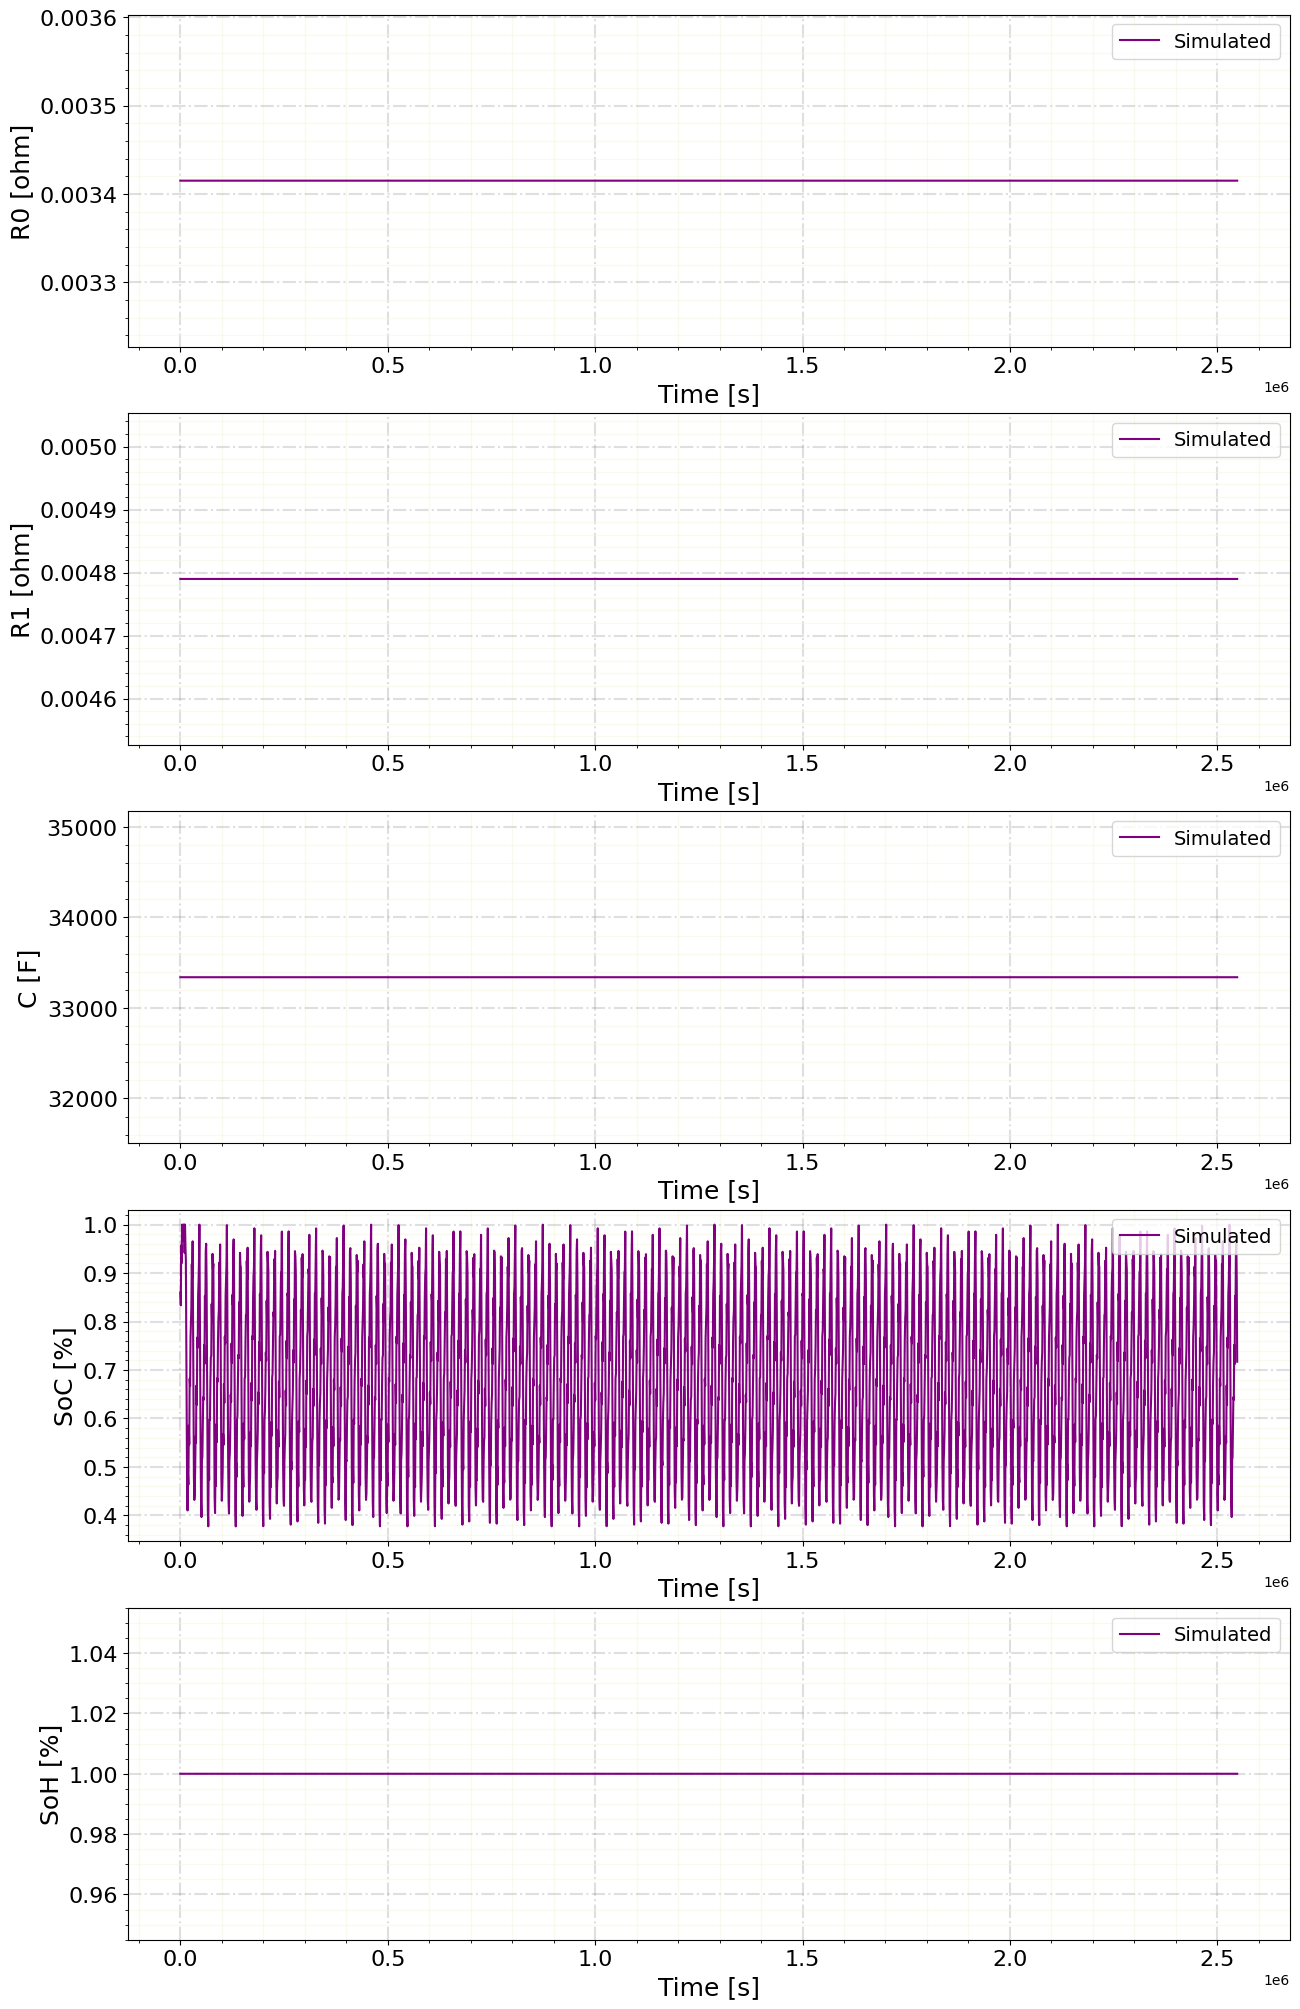

In [102]:
ernesto_plotter(**electrical_params)

In [77]:
ground_params = {
    'dfs': [df_ground],
    'variables': ['current'], 
    'x_axes': ['time'], 
    'x_labels': ['Time [s]'],
    'y_labels': ['[A]'],
    'labels': ['Ground'],
    'markers': ['s'],
    'line_styles': ['solid'],
    'plot_type': 'line',
    'colors': ['purple'],
    'sampling_rate': 1,
    'save_fig': False,
    'fig_name': 'PV',
    'pic_format': 'png',
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'figsize': (15, 5),
    'dest': file_path
}

In [ ]:
ernesto_plotter(**ground_params)

<Axes: >

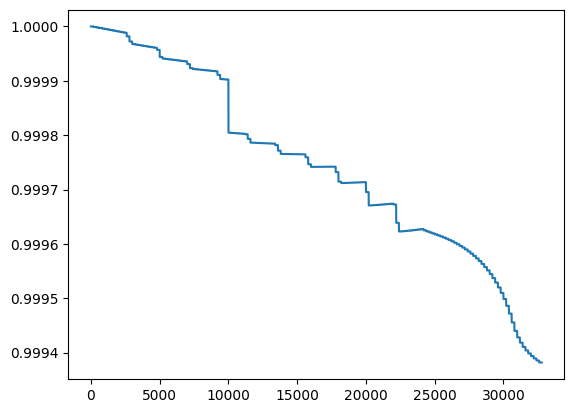

In [108]:
df_sim['soh'].plot()

<Axes: >

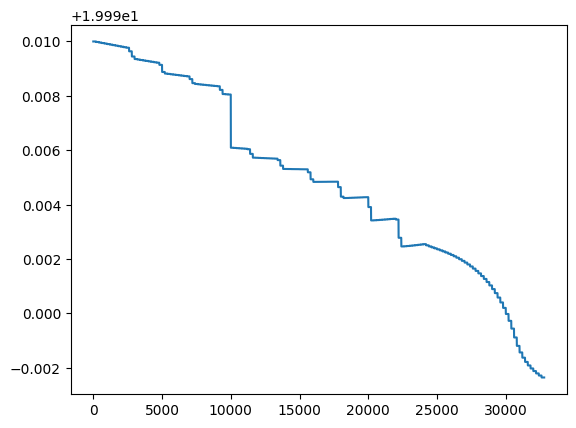

In [109]:
df_sim['c_max'].plot()

<Axes: >

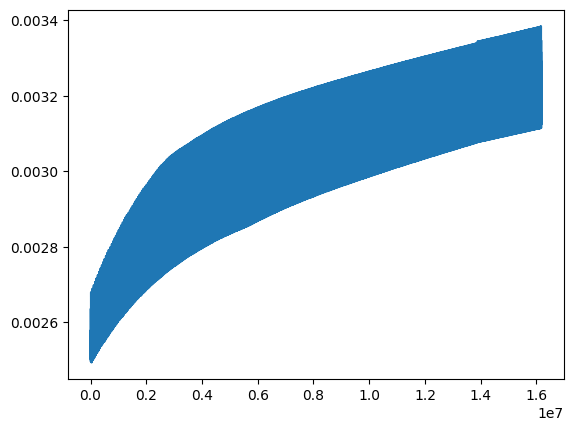

In [126]:
df_sim['r0'].plot()

<Axes: >

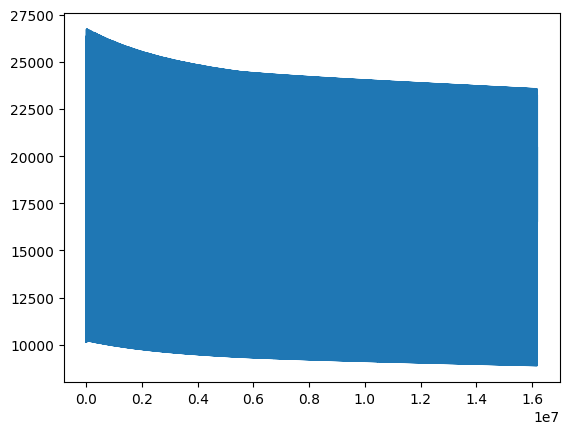

In [127]:
df_sim['c'].plot()